<a href="https://colab.research.google.com/github/Anastasia-Makarova/DATA_homeworks/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [13]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Прочитайте csv файл (використовуйте функцію read_csv)

In [129]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bestsellers with categories.csv')

Виведіть перші п'ять рядків (використовується функція head)

In [130]:
display(data.head())

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [131]:
display(data.shape)

(550, 7)

:**Відповідь**: Про скільки книг зберігає дані датасет?

🔸 351 книгa

In [132]:
len(data['Name'].unique())

351

Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [135]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
display(data.columns.to_list())

['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [19]:
display(data.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

**Відповідь**: Чи є в якихось змінних пропуски? (Так / ні)


🔸 ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [136]:
display(data['genre'].unique().tolist())

['Non Fiction', 'Fiction']

**Відповідь**: Які є унікальні жанри?

🔸 'Non Fiction', 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

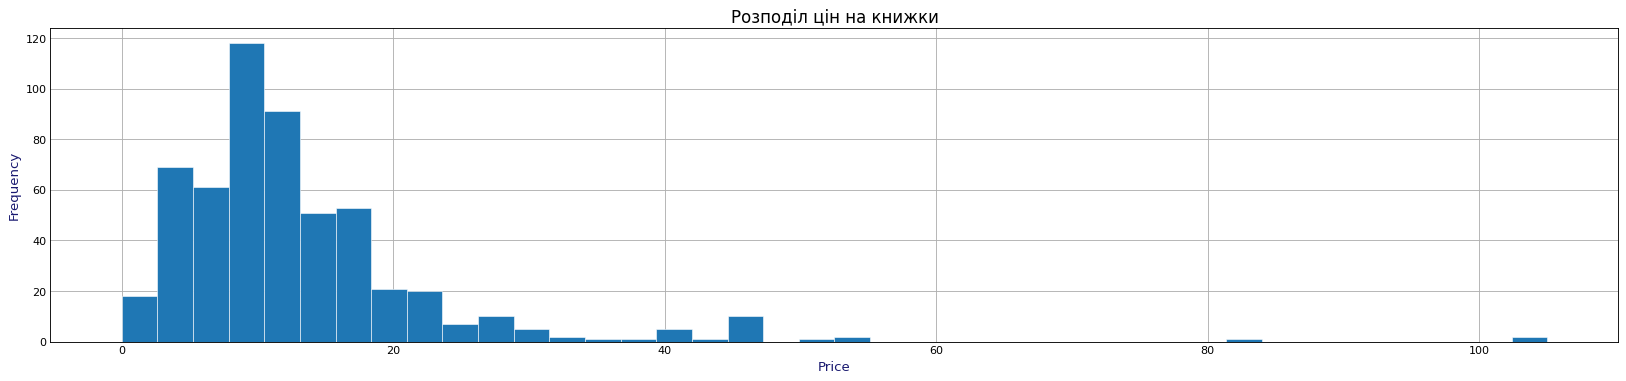

In [151]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(20, 4), dpi=80)

bins = len(data.groupby('price')['price'].count())
plt.hist(data['price'], bins=bins, linewidth=0.5, edgecolor="white")

plt.xlabel("Price", fontsize="large", color="midnightblue")
plt.ylabel("Frequency", fontsize="large", color="midnightblue")
plt.title("Розподіл цін на книжки", fontsize=15)

plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [22]:
print(f'Максимальна  ціна - {data["price"].max()}')
print(f'Мінімальна ціна - {data["price"].min()}')
print(f'Середня ціна - {data["price"].mean()}')
print(f'Медіанна ціна - {data["price"].median()}')

Максимальна  ціна - 105
Мінімальна ціна - 0
Середня ціна - 13.1
Медіанна ціна - 11.0


**Відповідь**: Максимальна ціна?

🔸  105


**Відповідь**: Мінімальна ціна?

🔸 0


**Відповідь**: Середня ціна?

🔸 13.1


**Відповідь**: Медіанна ціна?

🔸 11.0

# Пошук та сортування даних

**Відповідь**: Який рейтинг у датасеті найвищий?

🔸 Відповідь: 4.9

In [23]:
print(data['user_rating'].max())

4.9


**Відповідь**: Скільки книг мають такий рейтинг?

🔸 Відповідь: 52

In [152]:
display(data[data['user_rating']==4.9]['name'].count())

52

**Відповідь**: Яка книга має найбільше відгуків?

🔸 Відповідь: Where the Crawdads Sing by Delia Owens

In [25]:
display(data[data['reviews']==data['reviews'].max()])

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


**Відповідь**: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

🔸 Відповідь: Publication Manual of the American Psychological Association, 6th Edition

In [26]:
rate_2015 = data[data['year']==2015]
display(rate_2015[rate_2015['price']== rate_2015['price'].max()])

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


**Відповідь**: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

🔸 Відповідь: 20

In [153]:
result = data[(data['genre']=='Fiction') & (data['year']==2010)]['name'].count()
display(result)

20

**Відповідь**: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

🔸 Відповідь: 151

In [155]:
result = data[(data['user_rating']==4.9) | ((data['year']==2010) | (data['year']==2011))]['name'].count()
display(result)

151

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [29]:
result = data[(data['price'] < 8) & (data['year']==2015)]
result = result.sort_values(by='price')
display(result)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


**Відповідь**: Яка книга остання у відсортованому списку?

🔸 Відповідь: Old School (Diary of a Wimpy Kid #10) by Jeff Kinney

In [30]:
display(result.tail(1))

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


# Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [31]:
data.groupby('genre').agg({'price': ['min', 'max']})


price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

**Відповідь**: Максимальна ціна для жанру Fiction:

🔸 Відповідь: 82

**Відповідь**: Мінімальна ціна для жанру Fiction:

🔸 Відповідь: 0

**Відповідь**: Максимальна ціна для жанру Non Fiction:

🔸 Відповідь: 105

**Відповідь**: Мінімальна ціна для жанру Non Fiction:

🔸 Відповідь: 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [32]:
books_per_author = data.groupby('author').agg(books=('name', 'count'))

display(books_per_author)

,books
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


**Відповідь**: Якої розмірності вийшла таблиця?

🔸 Відповідь: 248 x 1

In [33]:
print(books_per_author.shape)

(248, 1)


**Відповідь**: Який автор має найбільше книг?

🔸 Відповідь: Jeff Kinney

In [34]:
display(books_per_author.sort_values(by='books', ascending=False).head(1))

,books
author,
Jeff Kinney,12


**Відповідь**: Скільки книг цього автора?

🔸 Відповідь: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [35]:
authors_by_rating = data.groupby('author').agg(avg_rating = ('user_rating', 'mean'))
display(authors_by_rating)

,avg_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


**Відповідь**: У якого автора середній рейтинг мінімальний?


🔸 Відповідь: Donna Tartt

In [36]:
display(authors_by_rating.sort_values('avg_rating').head(1))

,avg_rating
author,
Donna Tartt,3.9


**Відповідь**: Який у цього автора середній рейтинг?


🔸 Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [37]:
authors = pd.concat([books_per_author, authors_by_rating], axis=1)
display(authors)

,books,avg_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000



Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [38]:
display(authors.sort_values(by=['books', 'avg_rating'], ascending=[True, True]))

,books,avg_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


**Відповідь**: Який автор перший у списку?


🔸 Відповідь: Muriel Barbery

In [39]:
authors.sort_values(by=['books', 'avg_rating'], ascending=[True, True]).head(1)

,books,avg_rating
author,,
Muriel Barbery,1,4.0


# Візуалізація

додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

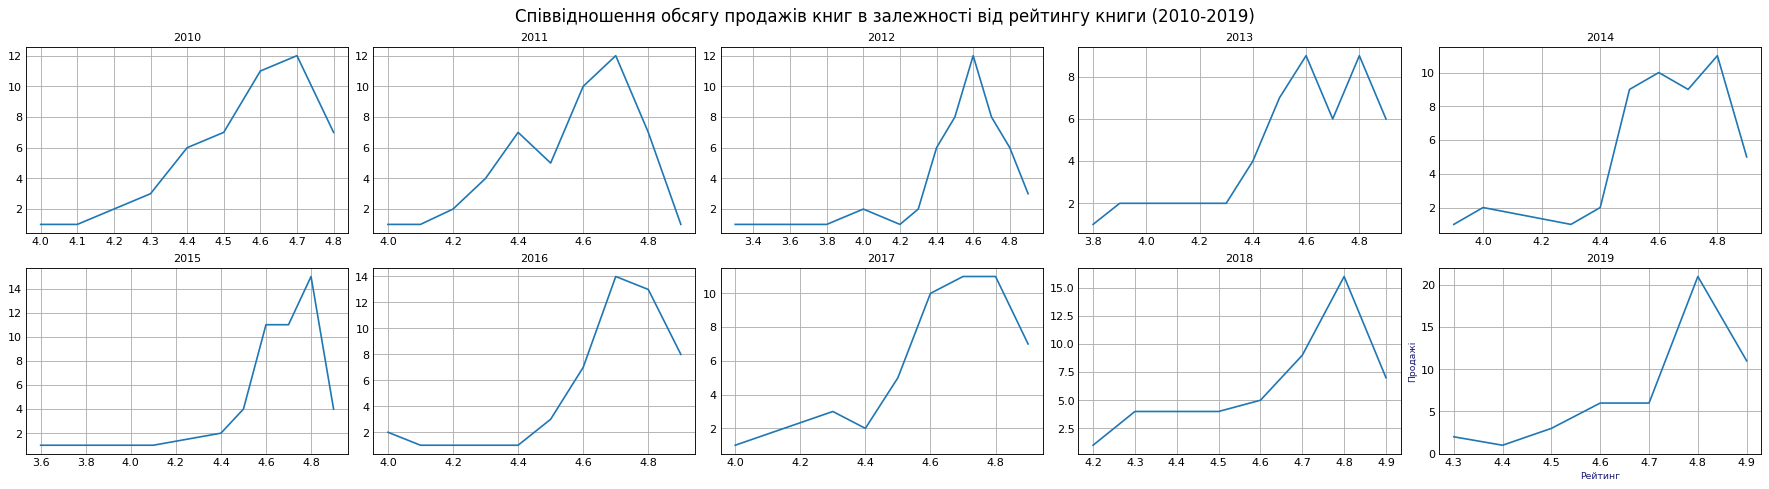

In [40]:
fig, axs = plt.subplots(2, 5, figsize=(22, 6), dpi=80, layout="constrained")

x, y = 0, 0
year = 2010


while x <= 1:
  while y <= 4:
    sales_by_rating_year = data[data['year'] == year]
    sales_by_rating = sales_by_rating_year.groupby('user_rating')['name'].count()

    axs[x,y].plot(sales_by_rating.index, sales_by_rating.values)
    axs[x,y].set_title(f'{year}', fontsize=10)
    plt.xlabel("Рейтинг", fontsize="small", color="midnightblue")
    plt.ylabel("Продажі", fontsize="small", color="midnightblue")
    year += 1

    y += 1

  x += 1
  y = 0


fig.suptitle('Співвідношення обсягу продажів книг в залежності від рейтингу книги (2010-2019)', fontsize=15)

plt.show()

In [91]:
unique_books_by_genre = data.groupby('genre')['name'].nunique()
unique_books_by_genre

genre
Fiction        160
Non Fiction    191
Name: name, dtype: int64

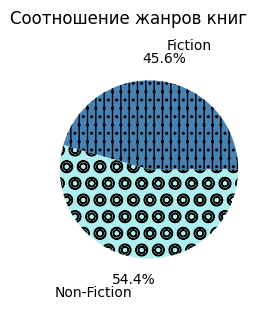

In [114]:
unique_books_by_genre = data.groupby('genre')['name'].nunique()

labels = 'Fiction', 'Non-Fiction'
fig, ax = plt.subplots()

ax.pie(
    unique_books_by_genre,
    labels=labels,
    autopct='%1.1f%%',
    colors = ['steelblue', 'paleturquoise'],
    hatch=['.||.', 'oO'],
    pctdistance=1.25,
    labeldistance=1.4)

plt.title('Соотношение жанров книг', y=1.2, loc='right')
plt.axis('equal')
plt.show()


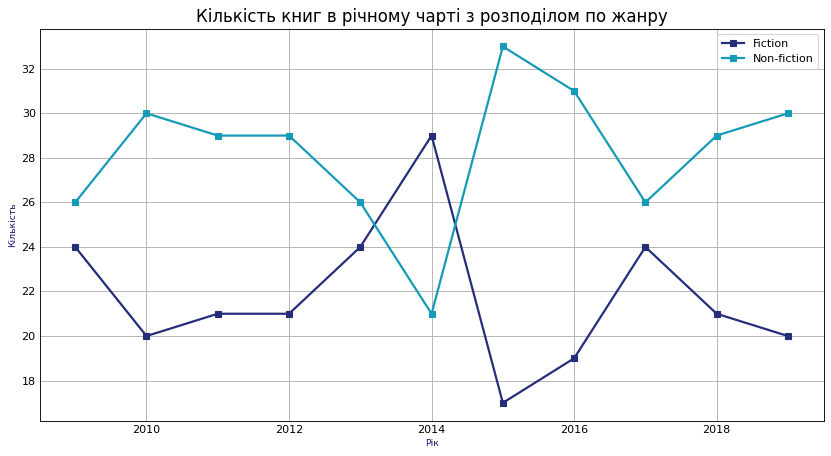

In [79]:
fic_by_year = data[data['genre']=='Fiction'].groupby('year').count()
nonfic_by_year = data[data['genre']=='Non Fiction'].groupby('year').count()

plt.figure(figsize=(10, 5), dpi=80)
line_1 = plt.plot(
    data['year'].sort_values().unique(),
    fic_by_year['genre'],
    label="Fiction",
    linestyle="-",
    color="#262d79",
    linewidth=2,
    marker="s",
)
line_2 = plt.plot(
    data['year'].sort_values().unique(),
    nonfic_by_year['genre'],
    label="Non-fiction",
    linestyle="-",
    color="#159ab7",
    linewidth=2,
    marker="s",
)
plt.xlabel("Рік", fontsize="small", color="midnightblue")
plt.ylabel("Кількість", fontsize="small", color="midnightblue")
plt.title("Кількість книг в річному чарті з розподілом по жанру", fontsize=15)
plt.legend()
plt.grid(visible=True, axis='y')
plt.show()




In [51]:
 data.groupby(by='name').count().sort_values('year', ascending=False).head(30)

,author,user_rating,reviews,price,year,genre
name,,,,,,
"Publication Manual of the American Psychological Association, 6th Edition",10,10,10,10,10,10
StrengthsFinder 2.0,9,9,9,9,9,9
"Oh, the Places You'll Go!",8,8,8,8,8,8
The Very Hungry Caterpillar,7,7,7,7,7,7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,7,7,7,7,7,7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),6,6,6,6,6,6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),6,6,6,6,6,6
The Official SAT Study Guide,5,5,5,5,5,5
To Kill a Mockingbird,5,5,5,5,5,5


<Figure size 800x600 with 0 Axes>

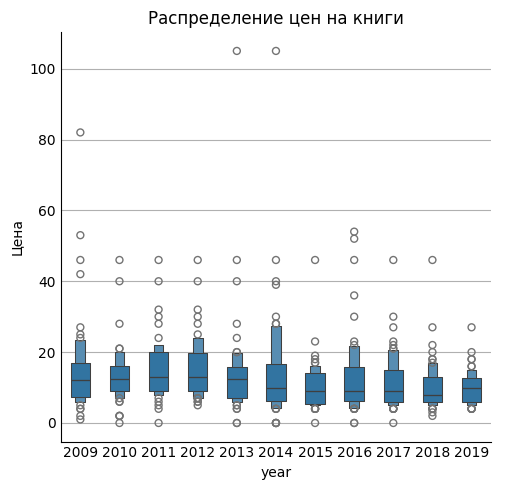

In [75]:
plt.figure(figsize=(8, 6))
sns.catplot(data=data, x='year', y='price',  kind="boxen",fill=True, width=.5)
plt.title('Распределение цен на книги')
plt.ylabel('Цена')
plt.tight_layout()
plt.show()

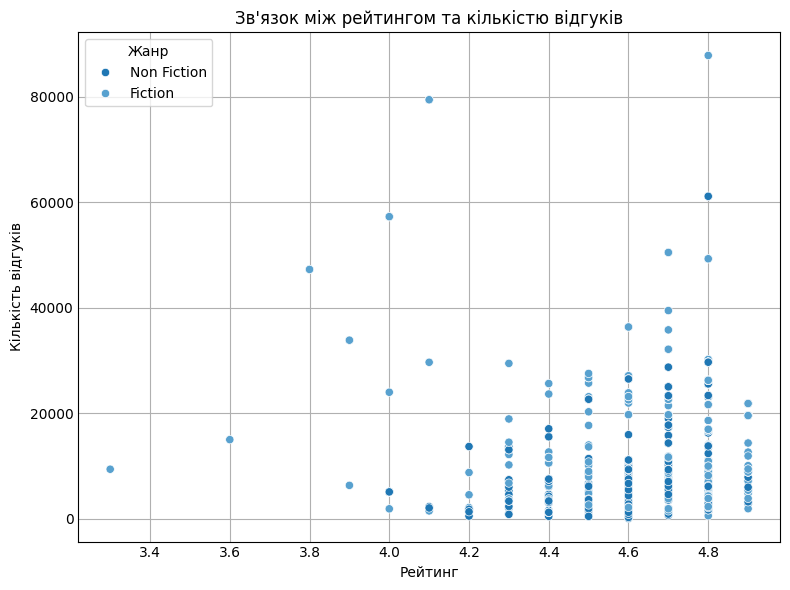

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['user_rating'], y=data['reviews'], hue=data['genre'])
plt.title('Зв\'язок між рейтингом та кількістю відгуків')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість відгуків')
plt.legend(title='Жанр')
plt.tight_layout()
plt.show()